In [1]:
import numpy as np
import pickle
from plotnine import *
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
directory = 'results/2pMixBU/'
datam = pd.read_csv(directory +'rl_1_15pm.txt', sep=",", header=None)
datam2 = pd.read_csv(directory +'rl_2_15pm.txt', sep=",", header=None)
directory = 'results/2pdeepBU/'
datad = pd.read_csv(directory +'rl_1_15pm.txt', sep=",", header=None)
datad2 = pd.read_csv(directory +'rl_2_15pm.txt', sep=",", header=None)
directory = 'results/2pshallowBU/'
datas = pd.read_csv(directory +'rl_1_15pm.txt', sep=",", header=None)
datas2 = pd.read_csv(directory +'rl_2_15pm.txt', sep=",", header=None)
print(min(np.array([len(datam),len(datas),len(datas)])))

169


In [5]:
depth = 60
ligneId = min(np.array([len(datam),len(datas),len(datas)]))-1

dfm1= (pd.DataFrame([datam.iloc[ligneId] ]).T - pd.DataFrame([datad.iloc[ligneId] ]).T)*100/pd.DataFrame([datad.iloc[ligneId] ]).T
dfm2= (pd.DataFrame([datam2.iloc[ligneId] ]).T - pd.DataFrame([datas.iloc[ligneId] ]).T)*100/pd.DataFrame([datas.iloc[ligneId] ]).T
dfm1['scenario'] = "mix"
dfm2['scenario'] = "mix"
dfm1['phenotype'] = "deep"
dfm2['phenotype'] ="shallow" 
dfm1['depth'] = np.array(list(range(depth))) +0.5
dfm2['depth'] = np.array(list(range(depth))) +0.5

'''
dfd1= pd.DataFrame([datad.iloc[ligneId] ]).T
dfd2= pd.DataFrame([datad2.iloc[ligneId] ]).T
dfd1['scenario'] = "deep"
dfd2['scenario'] = "deep"
dfd1['phenotype'] = "deep"
dfd2['phenotype'] = "deep"
dfd1['depth'] = np.array(list(range(depth))) +0.5
dfd1['depth'] = np.array(list(range(depth))) +0.5


dfs1= pd.DataFrame([datas.iloc[ligneId] ]).T
dfs2= pd.DataFrame([datas2.iloc[ligneId] ]).T
dfs1['scenario'] = "shallow"
dfs2['scenario'] = "shallow"
dfs1['phenotype'] = "shallow"
dfs2['phenotype'] = "shallow"
dfs1['depth'] = np.array(list(range(depth))) +0.5
dfs2['depth'] = np.array(list(range(depth))) +0.5

df3 = pd.concat([dfm1, dfm2,dfd1,dfd2,dfs1,dfs2])
df3 = df3.rename(columns={ligneId: 'RLD'})
print(df3, np.sum(dfm1[ligneId]), np.sum(dfm2[ligneId]), 
      np.sum(dfd1[ligneId]), np.sum(dfd2[ligneId]), 
      np.sum(dfs1[ligneId]), np.sum(dfs2[ligneId]))
'''
df3 = pd.concat([dfm1, dfm2])
df3 = df3.rename(columns={ligneId: 'RLD'})

/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 41 rows containing missing values.
/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/guides/guides.py:187: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


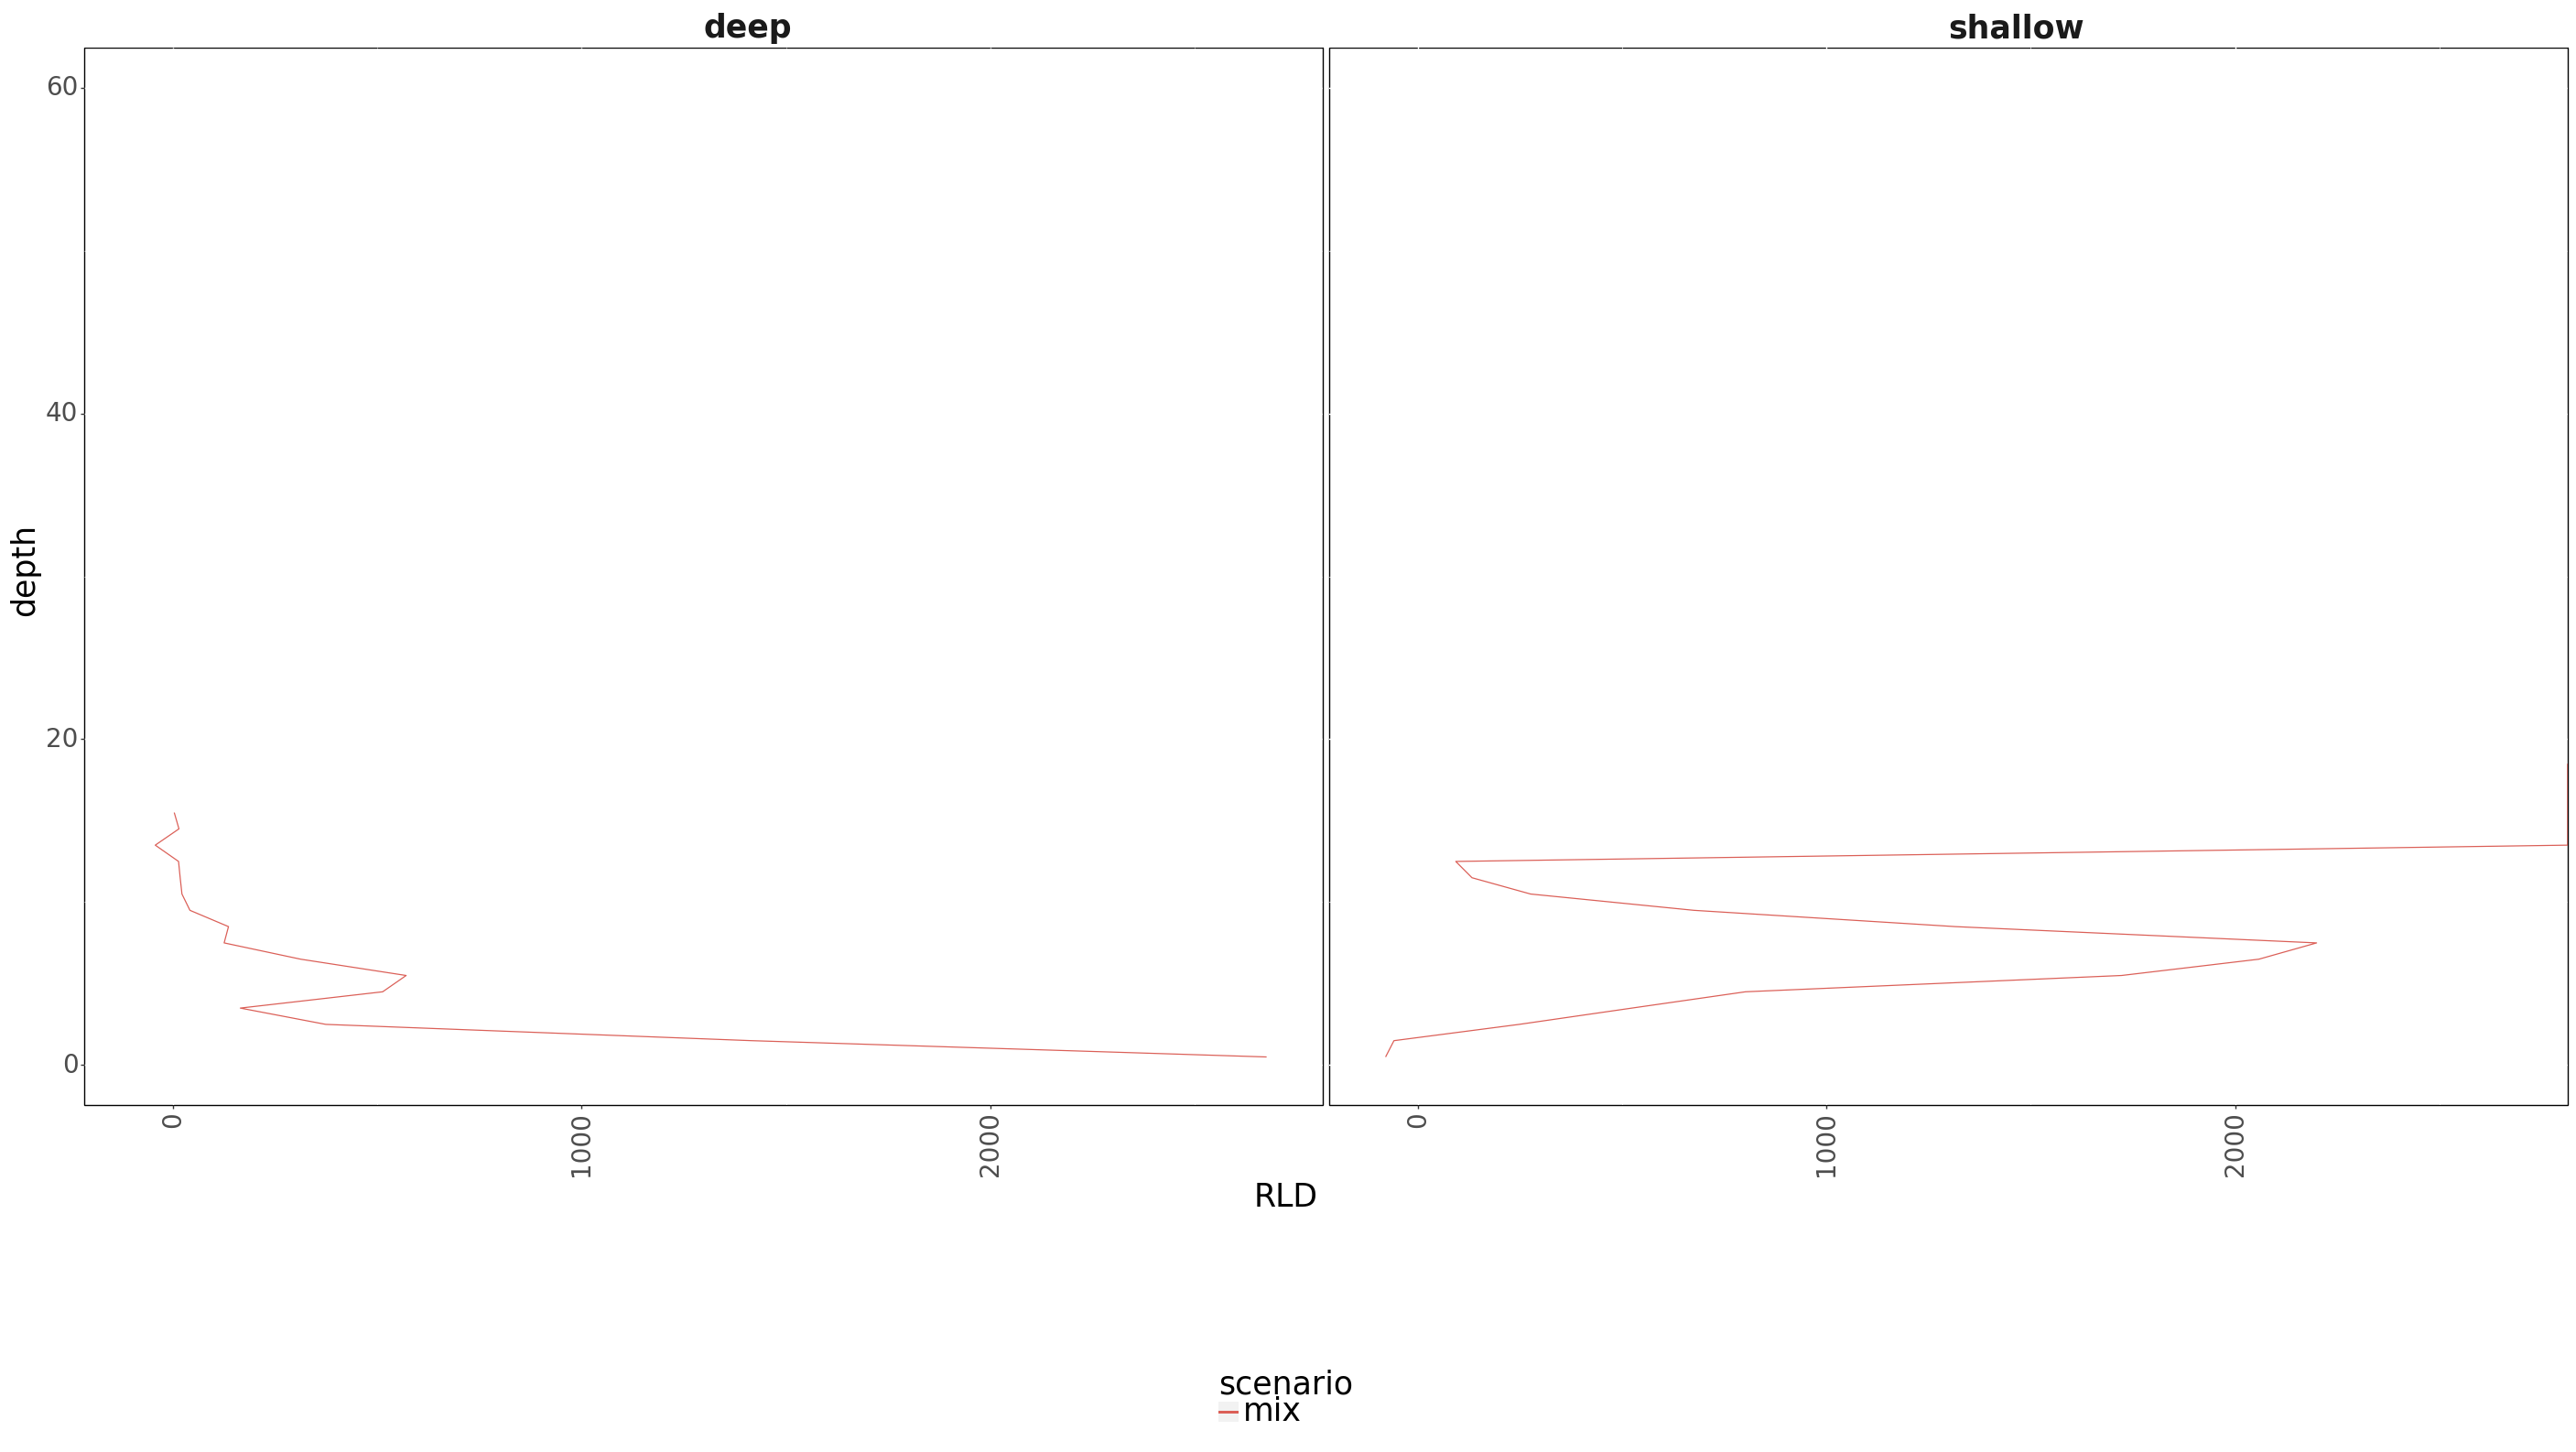

<ggplot: (8788149604789)>

In [6]:
from plotnine import options
options.figure_size = (35, 15)
(
    ggplot(df3)  # What data to use
    + aes(x='depth', y= "RLD" ,  group="scenario",  color="scenario")  # What variable to use
    + geom_line()  # Geometric object to use for drawing
    + xlab("depth")
    + coord_flip()
    + facet_wrap("phenotype")
    + ylab("RLD")
    + scale_fill_manual(name="",
                     values = ["#FC8D62","#8DA0CB"])
    
    +theme(legend_text = element_text( size=25),
        legend_title = element_text( size=25),
        panel_border = element_rect(color = "black", fill = "white", size = 1), 
        legend_position= [0.5,-0.1],
        #legend.direction = "horizontal",
        legend_box = "vertical",
        panel_grid_minor = element_line(colour="white"),
        panel_grid_major = element_line(colour="white"),
        panel_background = element_rect(fill="white", color="black"),
        strip_text_y =element_text( size=25) ,
        axis_text_x =element_text(angle = 90, size=20) ,
        axis_text = element_text( size=20),
        axis_title = element_text( size=25),
        strip_background = element_rect(fill="white"),
        strip_text = element_text(size = 25, hjust = 0,face ="bold")) 
)

In [7]:
depth = 60
ligneId = min(np.array([len(datam),len(datas),len(datas)]))-1

dfm1= pd.DataFrame([datam.iloc[ligneId] ]).T #- pd.DataFrame([datad.iloc[ligneId] ]).T)*100/pd.DataFrame([datad.iloc[ligneId] ]).T
dfm2= pd.DataFrame([datam2.iloc[ligneId] ]).T# - pd.DataFrame([datas.iloc[ligneId] ]).T)*100/pd.DataFrame([datas.iloc[ligneId] ]).T
dfm1['scenario'] = "mix"
dfm2['scenario'] = "mix"
dfm1['phenotype'] = "deep"
dfm2['phenotype'] ="shallow" 
dfm1['id'] = 1
dfm2['id'] =2 
dfm1['depth'] = np.array(list(range(depth))) +0.5
dfm2['depth'] = np.array(list(range(depth))) +0.5


dfd1= pd.DataFrame([datad.iloc[ligneId] ]).T
dfd2= pd.DataFrame([datad2.iloc[ligneId] ]).T
dfd1['scenario'] = "deep"
dfd2['scenario'] = "deep"
dfd1['phenotype'] = "deep"
dfd2['phenotype'] = "deep"
dfd1['id'] = 1
dfd2['id'] =2 
dfd1['depth'] = np.array(list(range(depth))) +0.5
dfd2['depth'] = np.array(list(range(depth))) +0.5


dfs1= pd.DataFrame([datas.iloc[ligneId] ]).T
dfs2= pd.DataFrame([datas2.iloc[ligneId] ]).T
dfs1['scenario'] = "shallow"
dfs2['scenario'] = "shallow"
dfs1['phenotype'] = "shallow"
dfs2['phenotype'] = "shallow"
dfs1['id'] = 1
dfs2['id'] =2 
dfs1['depth'] = np.array(list(range(depth))) +0.5
dfs2['depth'] = np.array(list(range(depth))) +0.5

df3 = pd.concat([dfm1, dfm2,dfd1,dfd2,dfs1,dfs2])
df3 = df3.rename(columns={ligneId: 'RLD'})
#print(df3, np.sum(dfm1[ligneId]), np.sum(dfm2[ligneId]), 
 #     np.sum(dfd1[ligneId]), np.sum(dfd2[ligneId]), 
  #    np.sum(dfs1[ligneId]), np.sum(dfs2[ligneId]))


/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 40 rows containing missing values.
/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/guides/guides.py:187: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


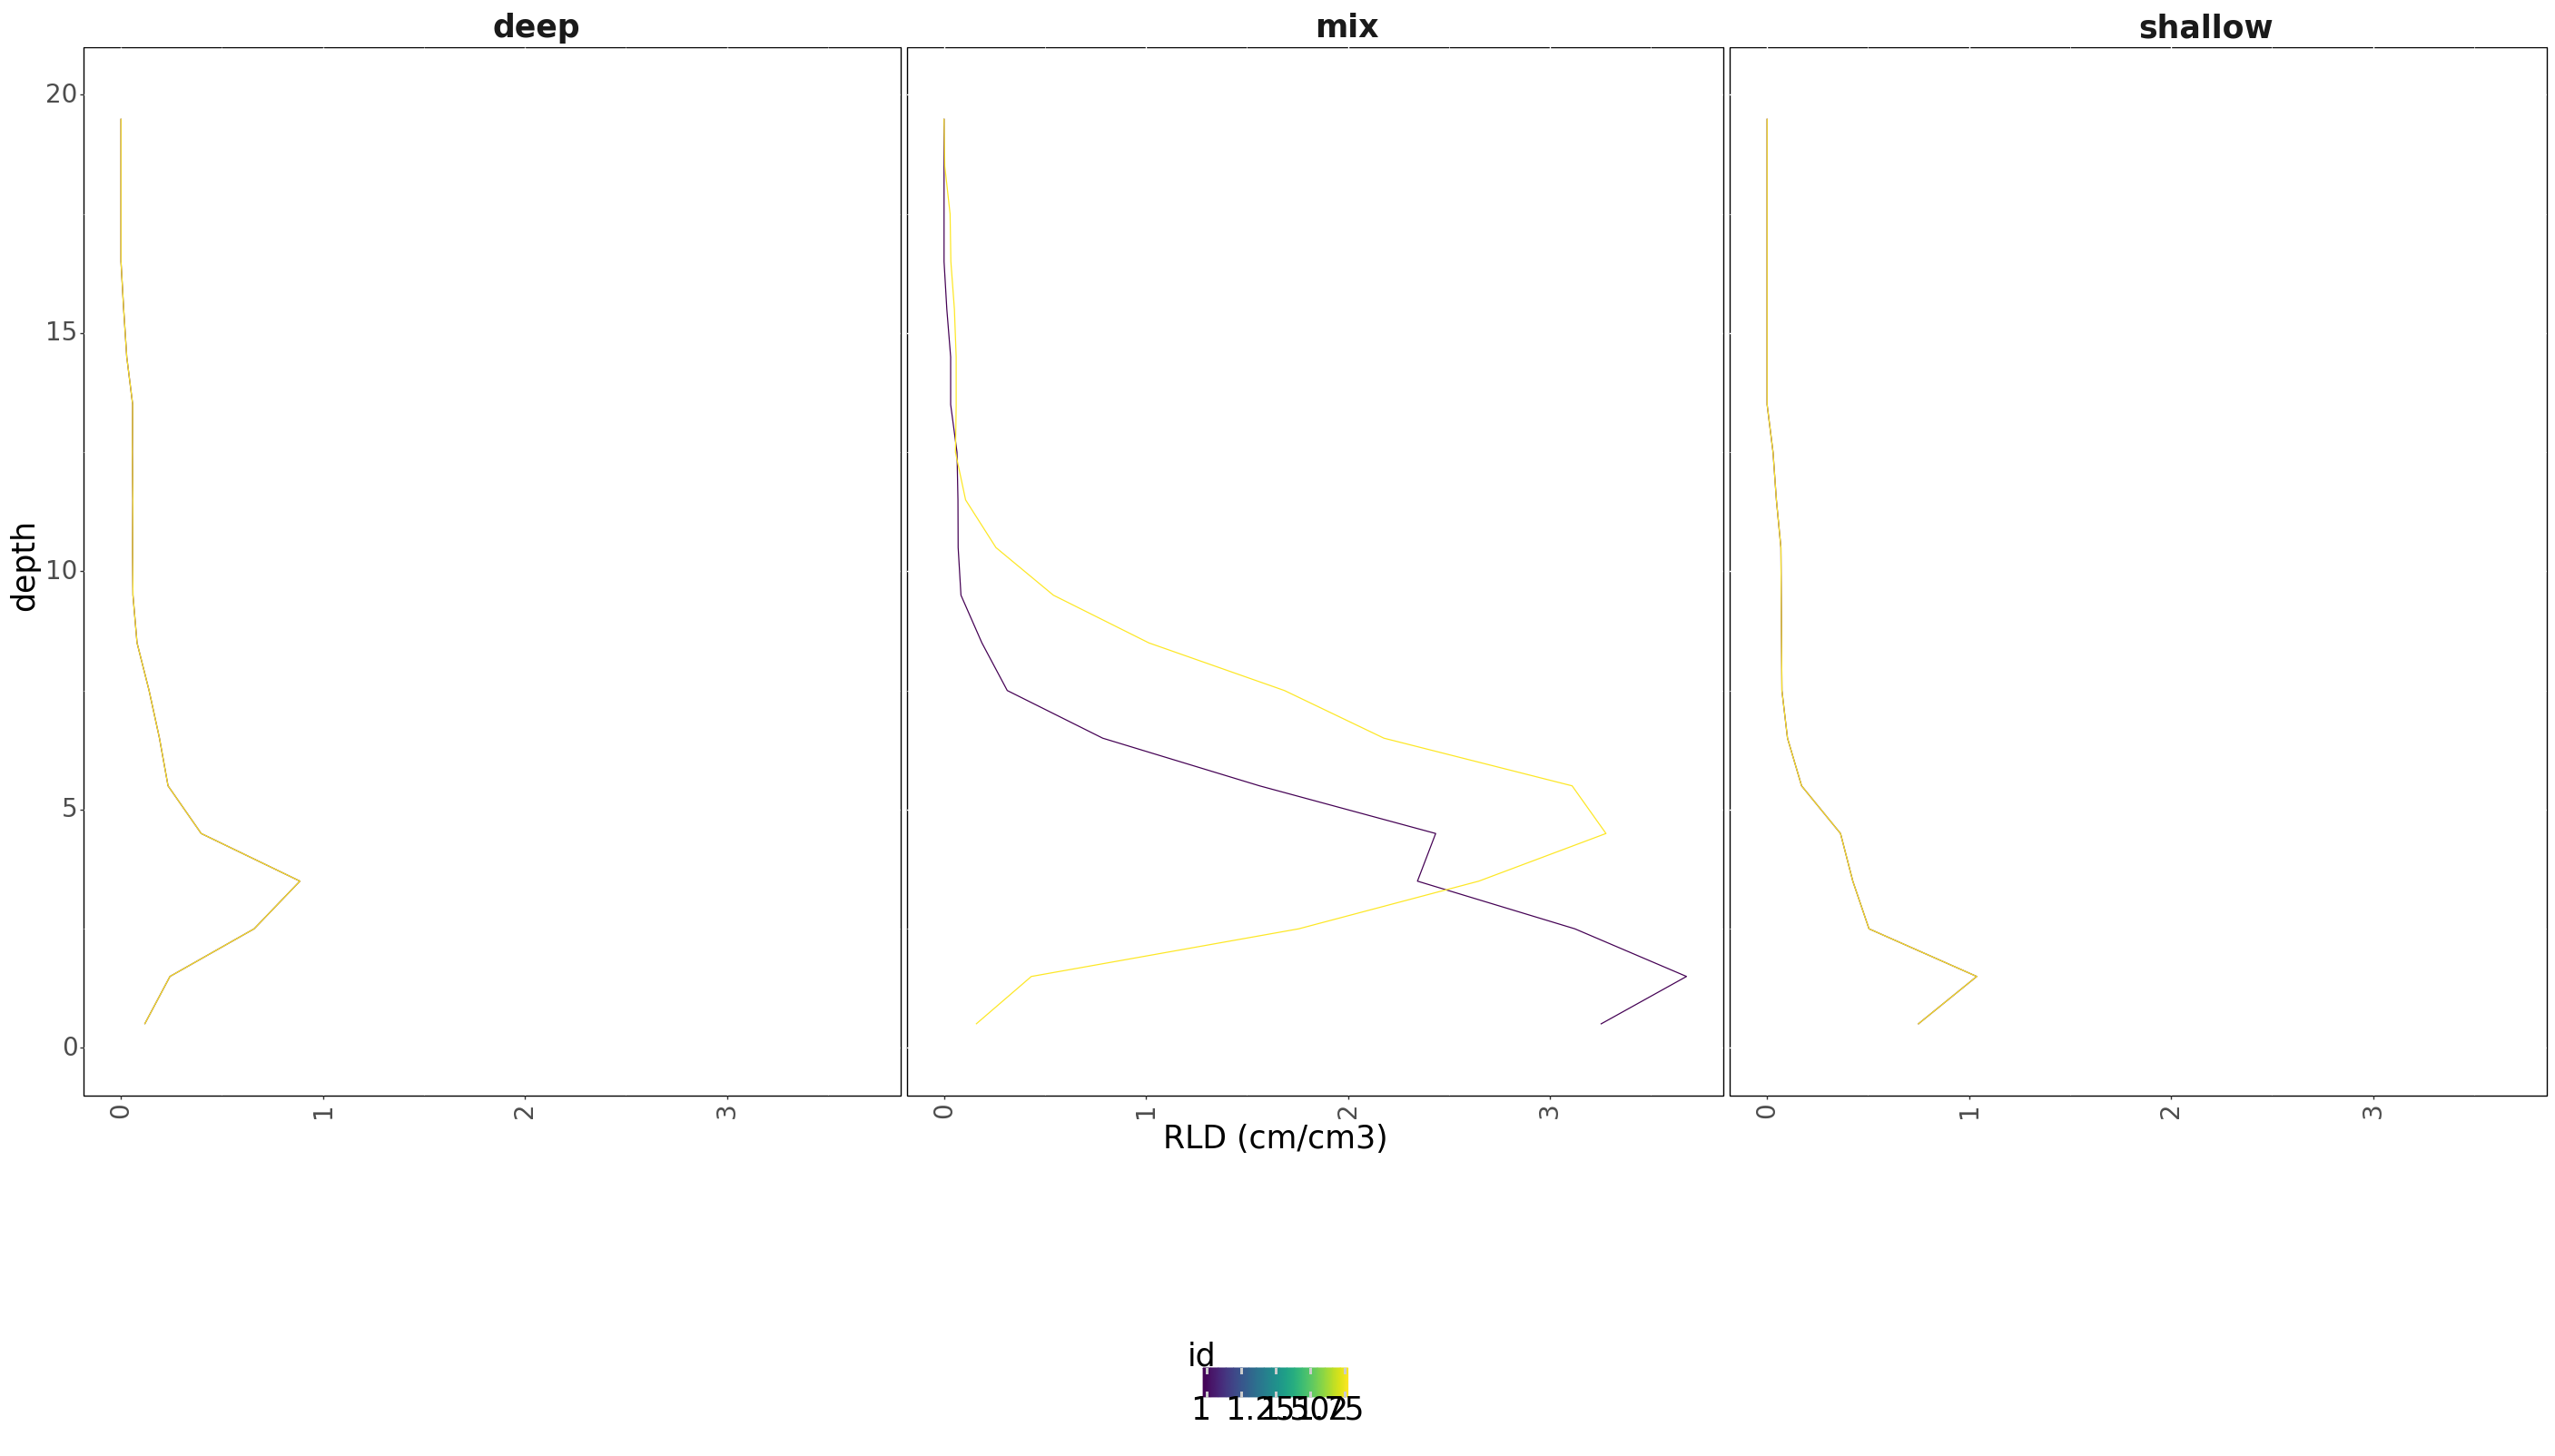

<ggplot: (8788146332519)>

In [8]:
from plotnine import options
options.figure_size = (35, 15)
(
    ggplot(df3)  # What data to use
    + aes(x='depth', y= "RLD" ,  group="id",  color="id")  # What variable to use
    + geom_line()  # Geometric object to use for drawing
    + xlab("depth")
    + coord_flip()
    + xlim(0,20)
    + facet_wrap("scenario")
    + ylab("RLD (cm/cm3)")
    + scale_fill_manual(name="",
                     values = ["#FC8D62","#8DA0CB"])
    
    +theme(legend_text = element_text( size=25),
        legend_title = element_text( size=25),
        panel_border = element_rect(color = "black", fill = "white", size = 1), 
        legend_position= [0.5,-0.1],
        #legend.direction = "horizontal",
        legend_box = "vertical",
        panel_grid_minor = element_line(colour="white"),
        panel_grid_major = element_line(colour="white"),
        panel_background = element_rect(fill="white", color="black"),
        strip_text_y =element_text( size=25) ,
        axis_text_x =element_text(angle = 90, size=20) ,
        axis_text = element_text( size=20),
        axis_title = element_text( size=25),
        strip_background = element_rect(fill="white"),
        strip_text = element_text(size = 25, hjust = 0,face ="bold")) 
)

In [41]:
depth = 35
ligneId = min(np.array([len(datam),len(datas),len(datas)]))-1

dfm1= pd.DataFrame([datam.iloc[ligneId] ]).T + pd.DataFrame([datam2.iloc[ligneId] ]).T# - pd.DataFrame([datas.iloc[ligneId] ]).T)*100/pd.DataFrame([datas.iloc[ligneId] ]).T
dfm1['scenario'] = "mixed"

dfm1['depth'] = np.array(list(range(depth))) +0.5


dfd1= pd.DataFrame([datad.iloc[ligneId] ]).T+ pd.DataFrame([datad2.iloc[ligneId] ]).T
dfd1['scenario'] = "deep-rooted"

dfd1['depth'] = np.array(list(range(depth))) +0.5


dfs1= pd.DataFrame([datas.iloc[ligneId] ]).T+pd.DataFrame([datas2.iloc[ligneId] ]).T
dfs1['scenario'] = "shallow-rooted"

dfs1['depth'] = np.array(list(range(depth))) +0.5

df3 = pd.concat([dfm1, dfd1,dfs1])
df3 = df3.rename(columns={ligneId: 'RLD'})


In [57]:
df3 = df3[df3['depth'] < 25]

/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/guides/guides.py:187: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


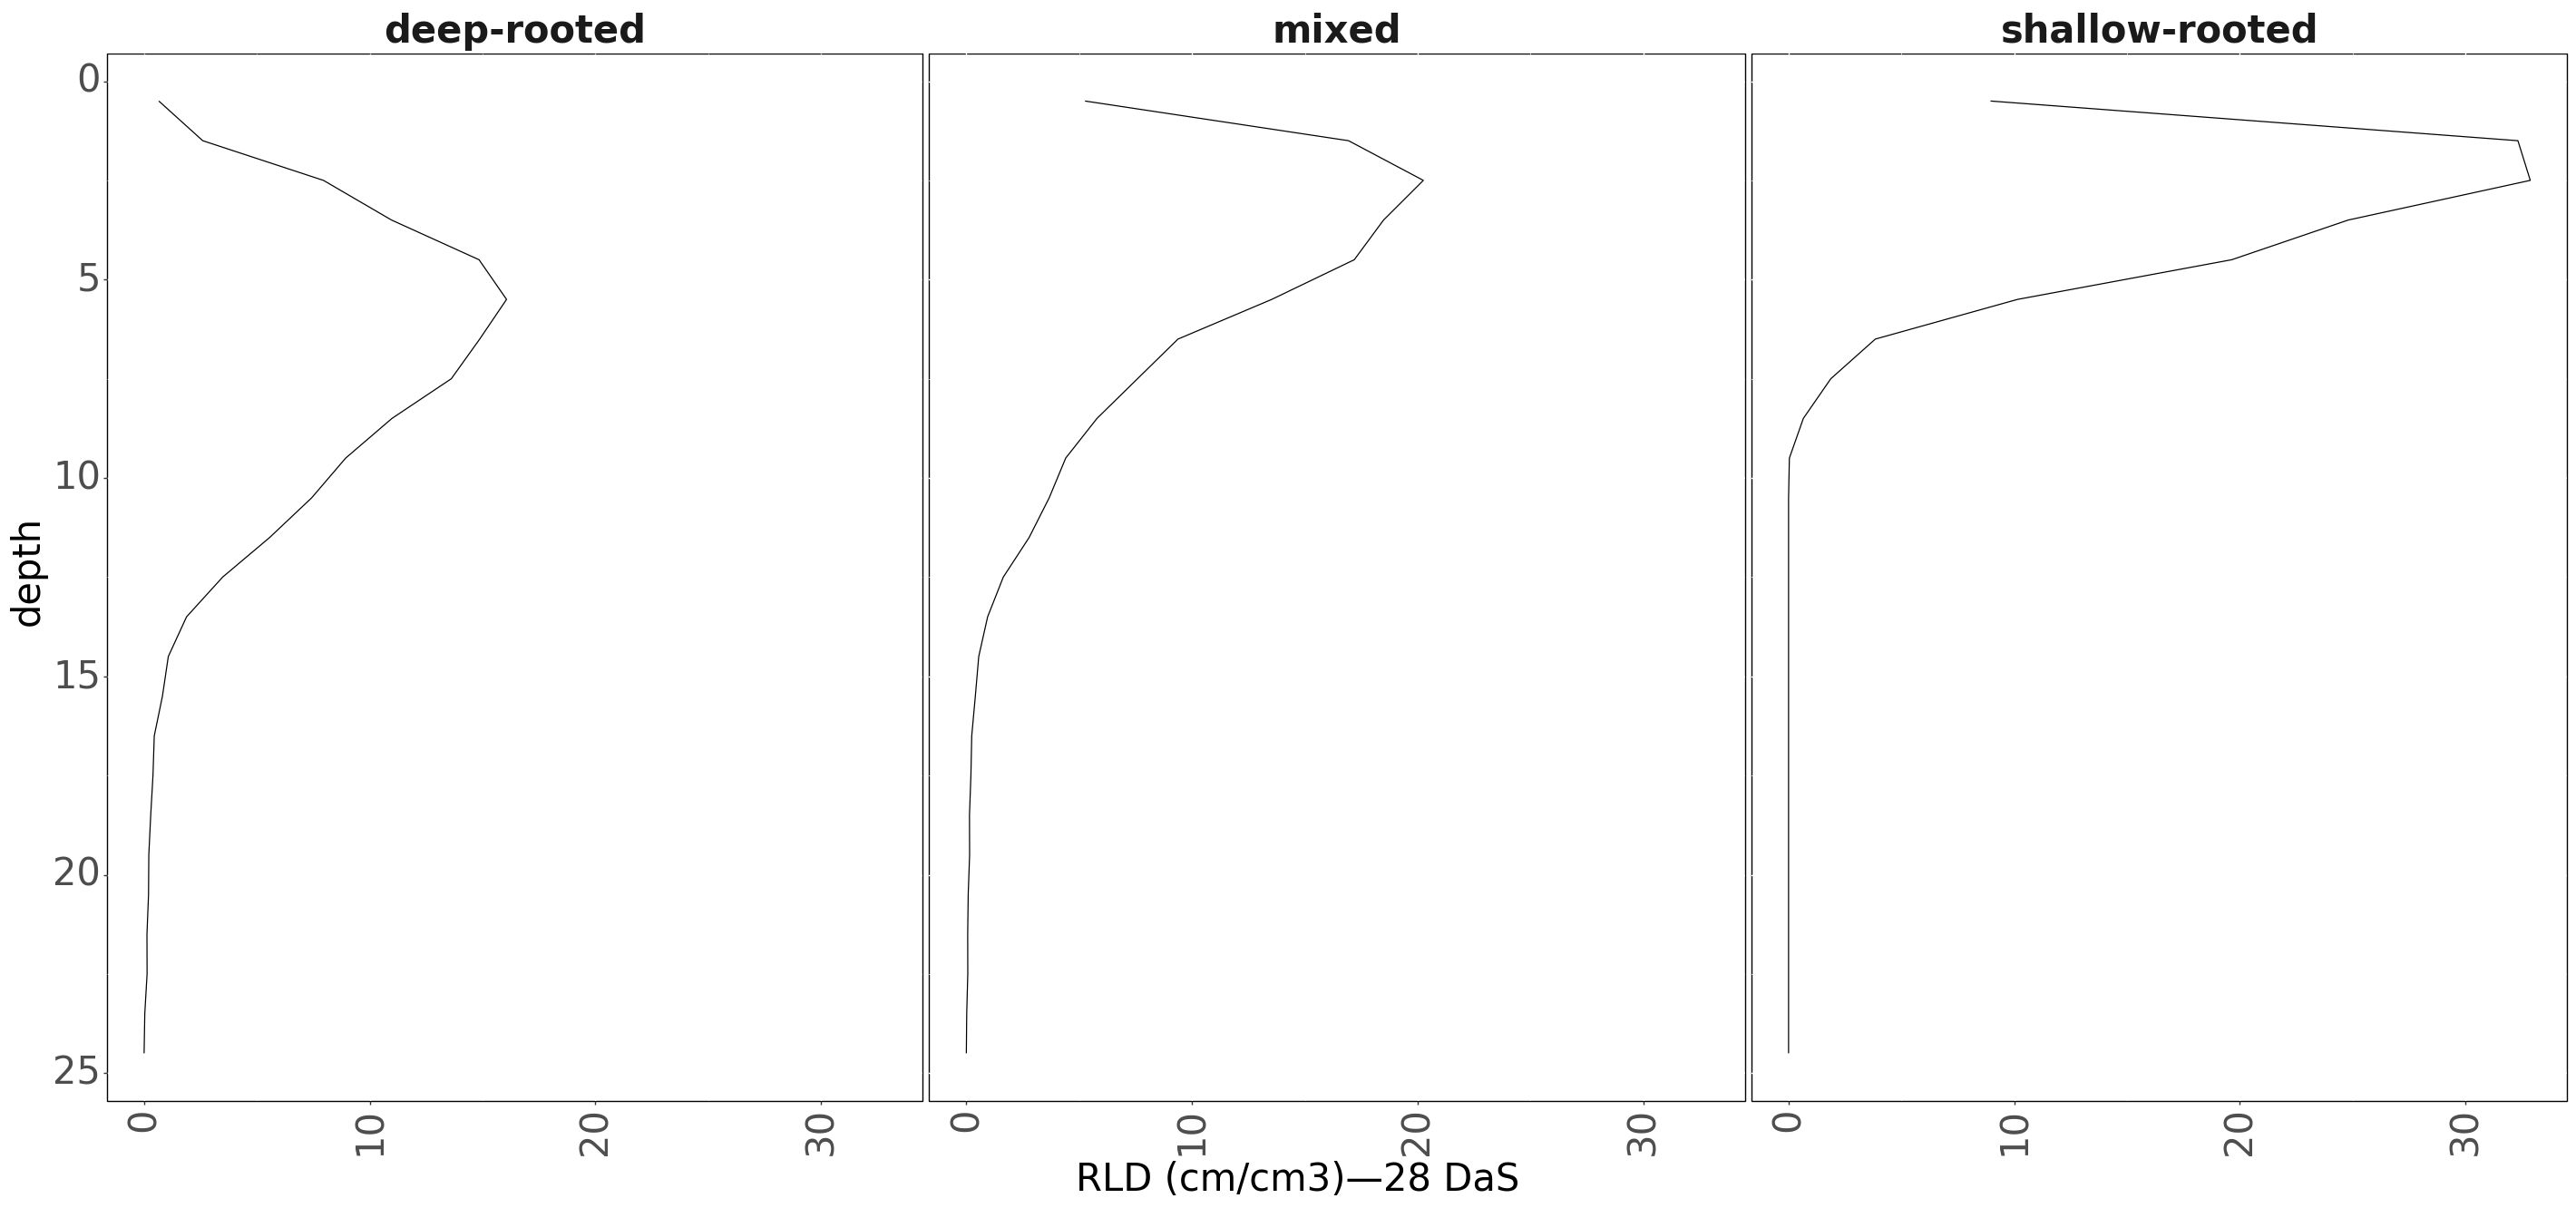

<ggplot: (8731121896165)>

In [58]:
from plotnine import options
options.figure_size = (35, 15)
(
    ggplot(df3)  # What data to use
    + aes(x='depth', y= "RLD" )  # What variable to use
    + geom_line()  # Geometric object to use for drawing
    + xlab("depth")
    + coord_flip()
    + scale_x_reverse()
    + facet_wrap("scenario")
    + ylab("RLD (cm/cm3)—28 DaS")
    + scale_fill_manual(name="",
                     values = ["#FC8D62","#8DA0CB"])
    
    +theme(legend_text = element_text( size=25),
        legend_title = element_text( size=25),
        panel_border = element_rect(color = "black", fill = "white", size = 1), 
        legend_position= [0.5,-0.1],
        #legend.direction = "horizontal",
        legend_box = "vertical",
        panel_grid_minor = element_line(colour="white"),
        panel_grid_major = element_line(colour="white"),
        panel_background = element_rect(fill="white", color="black"),
        strip_text_y =element_text( size=30) ,
        axis_text_x =element_text(angle = 90, size=30) ,
        axis_text = element_text( size=30),
        axis_title = element_text( size=30),
        strip_background = element_rect(fill="white"),
        strip_text = element_text(size = 30,face ="bold")) 
)

In [10]:

directory = 'results/2pMix/'
datam = pd.read_csv(directory +'soilWatPot_15pm.txt', sep=",", header=None)
directory = 'results/2pdeep/'
datad = pd.read_csv(directory +'soilWatPot_15pm.txt', sep=",", header=None)
directory = 'results/2pshallow/'
datas = pd.read_csv(directory +'soilWatPot_15pm.txt', sep=",", header=None)

In [13]:
vg = [0.059, 0.45, 0.00644, 1.503, 1]
def theta2H(theta):#(-) to cm
    thetar =vg[0]# 0.059
    thetas = vg[1]#0.445
    alpha = vg[2]#0.00644
    n = vg[3]#1.503
    nrev = 1/(1-1/n)
    H =-(((( (thetas - thetar)/(theta - thetar))**nrev) - 1)**(1/n))/alpha
    return(H)#cm
def H2Theta(H):#cm to 
    thetar =vg[0]# 0.059
    thetas = vg[1]#0.445
    alpha = vg[2]#0.00644
    n = vg[3]#1.503
    nrev = 1/(1-1/n)
    theta =( (thetas - thetar)/(((-H *alpha)**(n)+ 1)**(1/nrev))) + thetar
    return theta 

In [24]:
print(min(np.array([len(datam),len(datas),len(datas)])))

317


In [11]:
ligneId = min(np.array([len(datam),len(datas),len(datas)]))-1

dfm1=datam.iloc[:ligneId].apply(lambda x: x.str.strip('[]').astype(float)) 
dfd1= datad.iloc[:ligneId].apply(lambda x: x.str.strip('[]').astype(float)) 
dfs1=datas.iloc[:ligneId].apply(lambda x: x.str.strip('[]').astype(float))

In [14]:
dfthetam = np.vectorize(H2Theta)(dfm1)
dfthetad = np.vectorize(H2Theta)(dfd1)
dfthetas = np.vectorize(H2Theta)(dfs1)

In [15]:
dfmthetas = dfthetam.sum(axis =1)
dfdthetas = dfthetad.sum(axis =1)
dfsthetas = dfthetas.sum(axis =1)


In [18]:
print(dfmthetas[0],dfdthetas[0],dfsthetas[0])
print(dfmthetas[ligneId-1],dfdthetas[ligneId-1],dfsthetas[ligneId-1])

3023.5115532965633 3023.5087391534503 3023.508739454423
2682.583537569645 2645.3047610638796 2648.8645959902724


In [72]:
transpiM = -(dfmthetas-dfmthetas[0])
transpiD = -(dfdthetas-dfdthetas[0])
transpiS = -(dfsthetas-dfsthetas[0])

In [88]:
#print(transpiM,transpiD,transpiS)
import os
#os.getcwd()
np.savetxt("transpiM.csv", transpiM, delimiter=",")
np.savetxt("transpiD.csv", transpiD, delimiter=",")
np.savetxt("transpiS.csv", transpiS, delimiter=",")

In [1]:
from numpy import genfromtxt
transpiM = genfromtxt('transpiM.csv', delimiter=',')
transpiD = genfromtxt('transpiD.csv', delimiter=',')
transpiS = genfromtxt('transpiS.csv', delimiter=',')

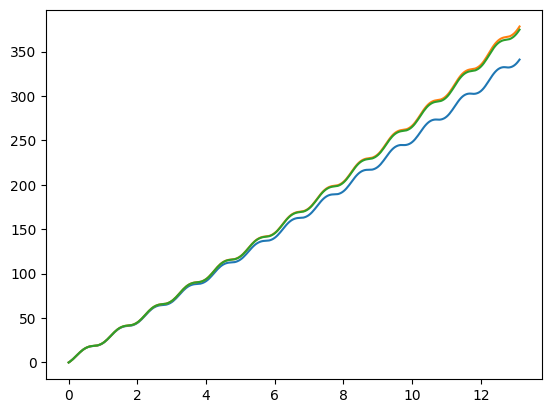

In [7]:
import matplotlib.pyplot as plt
plt.plot( [i/24 for i in range(len(transpiM))],transpiM)
plt.plot( [i/24 for i in range(len(transpiM))],transpiD)
plt.plot( [i/24 for i in range(len(transpiM))],transpiS)

In [56]:
theta1 = 30/100
print(theta2H(theta1),H2Theta(theta2H(theta1)))

-339.8802949222691 0.30000000000000004


In [41]:
dfm1.columns

Int64Index([316], dtype='int64')